In [1]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "output-train-by-char"
OUTPUT_PATH = "gan-data-pickle"

class_strs = [chr(i) for i in range(ord('0'), ord('9')+1)] + [chr(i) for i in range(ord('a'), ord('z')+1)]
num_classes = len(class_strs)
print(num_classes)
print(class_strs)

# if not os.path.exists(OUTPUT_PATH):
#     os.makedirs(OUTPUT_PATH)
# for label in class_strs:
#     path = f"{OUTPUT_PATH}/{label}"
#     if os.path.exists(path):
#         continue
#     os.makedirs(path)

36
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [3]:
def process_image(img):
    ratio = 28 / max(img.shape[0], img.shape[1])
    new_img = cv2.resize(img, (0,0), fx=ratio, fy=ratio)
    l = (28 - new_img.shape[1]) >> 1
    r = 28 - new_img.shape[1] - l
    t = (28 - new_img.shape[0]) >> 1
    b = 28 - new_img.shape[0] - t
    new_img = cv2.copyMakeBorder(new_img, t, b, l, r, cv2.BORDER_CONSTANT, value=int(img[0,0]))
    return new_img

In [4]:
images = []
labels = []
for i in range(num_classes):
    cnt = 0
    for file in glob.iglob(f"{DATA_PATH}/{class_strs[i]}/*.png"):
        img = process_image(cv2.imread(file, 0))
        print(f"{file}, {img.shape}")
        if img.shape[0] != 28 or img.shape[1] != 28:
            continue
        images.append(img)
        labels.append(i)
        cnt += 1
        if cnt == 1000:
            break

output-train-by-char/0\0024miih-0-0.png, (28, 28)
output-train-by-char/0\0024miih-0-1.png, (28, 28)
output-train-by-char/0\002k-0-0.png, (28, 28)
output-train-by-char/0\002k-0-1.png, (28, 28)
output-train-by-char/0\006aguv-0-0.png, (28, 28)
output-train-by-char/0\006aguv-0-1.png, (28, 28)
output-train-by-char/0\00fh-0-0.png, (28, 28)
output-train-by-char/0\00fh-0-1.png, (28, 28)
output-train-by-char/0\00hai-0-0.png, (28, 28)
output-train-by-char/0\00hai-0-1.png, (28, 28)
output-train-by-char/0\00hgi3n7-0-0.png, (28, 28)
output-train-by-char/0\00hgi3n7-0-1.png, (28, 28)
output-train-by-char/0\00o47-0-0.png, (28, 28)
output-train-by-char/0\00o47-0-1.png, (28, 28)
output-train-by-char/0\00wi5-0-0.png, (28, 28)
output-train-by-char/0\00wi5-0-1.png, (28, 28)
output-train-by-char/0\010b-0-0.png, (28, 28)
output-train-by-char/0\010b-0-2.png, (28, 28)
output-train-by-char/0\018l-0-0.png, (28, 28)
output-train-by-char/0\01gokr0s-0-0.png, (28, 28)
output-train-by-char/0\01gokr0s-0-6.png, (28, 28

In [5]:
images = np.array(images)[:,:,:,None]
labels = np.array(labels)
print(images.shape)

(36000, 28, 28, 1)


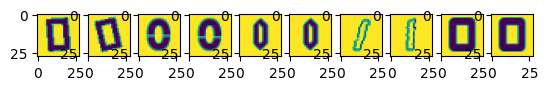

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [6]:
_, ax = plt.subplots(1, 10)
for i in range(10):
    ax[i].imshow(images[i])
plt.show()
print([class_strs[i] for i in labels[:10]])

In [7]:
with open(OUTPUT_PATH, "wb") as f:
    pickle.dump((images, labels), f)